<a href="https://colab.research.google.com/github/jhordi19/Ciencia_de_datos/blob/Taller_2025/Taller_Sem07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar Librerías

In [1]:
import pandas as pd  # Importar pandas para manejo de datos
import numpy as np  # Importar numpy para operaciones numéricas
import matplotlib as mpl  # Importar matplotlib para visualización de datos
import matplotlib.pyplot as plt  # Importar pyplot de matplotlib para trazar gráficos
import seaborn as sns  # Importar seaborn para gráficos estadísticos
from matplotlib import pyplot  # Importar pyplot de matplotlib para trazar gráficos
import warnings  # Importar warnings para gestionar advertencias
from sklearn.tree import DecisionTreeClassifier # Importar DecisionTreeClassifier para clasificación
from xgboost import XGBClassifier # Importar XGBClassifier para clasificación
from sklearn.model_selection import train_test_split  # Importar train_test_split para dividir los datos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Importar métricas de evaluación
from imblearn.over_sampling import SMOTE  # Importar SMOTE para el manejo de datos desbalanceados
from sklearn.ensemble import RandomForestClassifier  # Importar RandomForestClassifier para clasificación con bosques aleatorios
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, log_loss
import time
import joblib

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "LLCP2021.csv"

Brfss_2021 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dariushbahrami/cdc-brfss-survey-2021",
  file_path,
)

Brfss_2021.head()

/tmp/ipython-input-2-3832490364.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  Brfss_2021 = kagglehub.load_dataset(


100%|██████████| 48.2M/48.2M [00:00<00:00, 120MB/s]

Extracting zip of LLCP2021.csv...


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1,1,1192021,1,19,2021,1100,2021000001,2021000001,1.0,...,1,1,100.0,214.0,1,1,1,1,0,0
1,1,1,1212021,1,21,2021,1100,2021000002,2021000002,1.0,...,1,1,100.0,128.0,1,1,1,1,0,0
2,1,1,1212021,1,21,2021,1100,2021000003,2021000003,1.0,...,1,1,100.0,71.0,1,2,1,1,0,0
3,1,1,1172021,1,17,2021,1100,2021000004,2021000004,1.0,...,1,1,114.0,165.0,1,1,1,1,0,0
4,1,1,1152021,1,15,2021,1100,2021000005,2021000005,1.0,...,1,1,100.0,258.0,1,1,1,1,0,0


In [3]:
Brfss_2021.shape

(438693, 303)

In [4]:
# seleccionar columnas especificas
Brfss_2021 = Brfss_2021[['_RFHYPE6',
                         '_RFCHOL3',
                         '_BMI5',
                         '_SMOKER3',
                         'DIABETE4',
                         '_TOTINDA',
                         'DRNKANY5',
                         'ECIGNOW1',
                         'MENTHLTH',
                         '_SEX',
                         '_AGEG5YR',
                         'WTCHSALT']]

In [5]:
Brfss_2021

,_RFHYPE6,_RFCHOL3,_BMI5,_SMOKER3,DIABETE4,_TOTINDA,DRNKANY5,ECIGNOW1,MENTHLTH,_SEX,_AGEG5YR,WTCHSALT
0,1,2.0,1454.0,3,3.0,2,2,3.0,10.0,2,11,NaN
1,2,2.0,NaN,4,1.0,1,2,3.0,88.0,2,10,NaN
2,2,1.0,2829.0,4,1.0,2,2,3.0,88.0,2,11,NaN
3,2,2.0,3347.0,4,1.0,1,1,3.0,10.0,2,9,NaN
4,1,2.0,2873.0,4,1.0,1,2,3.0,88.0,1,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
438688,2,1.0,2469.0,3,2.0,1,1,3.0,20.0,2,3,NaN
438689,2,1.0,NaN,4,1.0,2,2,4.0,88.0,1,13,NaN
438690,1,2.0,3068.0,4,3.0,1,1,3.0,88.0,1,7,NaN
438691,2,1.0,2373.0,4,3.0,1,1,4.0,88.0,1,10,NaN


In [6]:
# Mostrar cantidad de valores nulos por columna
print(Brfss_2021.isnull().sum())

_RFHYPE6         0
_RFCHOL3     61151
_BMI5        46852
_SMOKER3         0
DIABETE4         3
_TOTINDA         0
DRNKANY5         0
ECIGNOW1     23025
MENTHLTH         2
_SEX             0
_AGEG5YR         0
WTCHSALT    402584
dtype: int64


In [7]:
# Eliminar datos faltantes
Brfss_2021 = Brfss_2021.dropna()
Brfss_2021.shape

(27004, 12)

In [8]:
# _RFHYPE6
# Medico le indico si tiene hipertension
#Cambiar 1 a 0 y 2 a 1 y eliminamos los datos que no saben o no responden (9)
Brfss_2021['_RFHYPE6'] = Brfss_2021['_RFHYPE6'].replace({1:0, 2:1})
Brfss_2021 = Brfss_2021[Brfss_2021._RFHYPE6 != 9]
Brfss_2021._RFHYPE6.unique()

/tmp/ipython-input-8-2218722740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brfss_2021['_RFHYPE6'] = Brfss_2021['_RFHYPE6'].replace({1:0, 2:1})


array([1, 0])

In [9]:
# #2 _RFCHOL
# Colesterol
# Adultos a quienes se les ha revisado el colesterol y un médico,
# enfermera u otro profesional de la salud les ha dicho que estaba alto.
# cambiar el 1 por 0 y el 2 por 1 y borramos el 9
Brfss_2021['_RFCHOL3'] = Brfss_2021['_RFCHOL3'].replace({1:0, 2:1})
Brfss_2021 = Brfss_2021[Brfss_2021._RFCHOL3 != 9]
Brfss_2021._RFCHOL3.unique()

array([1., 0.])

In [10]:
#4 _BMI5 (no changes, just note that these are BMI * 100. So for example a BMI of 4018 is really 40.18)
Brfss_2021['_BMI5'] = Brfss_2021['_BMI5'].div(100).round(0)
Brfss_2021._BMI5.unique()

array([34., 24., 26., 28., 22., 25., 36., 33., 27., 49., 32., 21., 20.,
       50., 31., 29., 30., 23., 19., 38., 46., 37., 42., 35., 17., 44.,
       18., 58., 14., 45., 40., 51., 15., 39., 47., 43., 16., 41., 56.,
       63., 81., 48., 57., 67., 53., 71., 75., 59., 54., 78., 55., 13.,
       62., 61., 52., 68., 76., 12., 60., 74., 64., 65., 66., 73., 99.,
       69., 70., 95.])

In [11]:
#5 _SMOKER3
# Eliminar todos los registros con valor 9 (se negó a responder)
Brfss_2021 = Brfss_2021[Brfss_2021._SMOKER3 != 9]
Brfss_2021._SMOKER3.unique()

array([4, 3, 1, 2])

In [12]:
#6 _ECIGNOW1
# Remove all 9 (refused)
# Corrected filtering to remove rows where ECIGNOW1 is equal to 7 or 9
Brfss_2021 = Brfss_2021[~Brfss_2021['ECIGNOW1'].isin([7, 9])]
Brfss_2021.ECIGNOW1.unique()

array([3., 4., 2., 1.])

In [13]:
#7 DIABETE3
# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
Brfss_2021['DIABETE4'] = Brfss_2021['DIABETE4'].replace({2:0, 3:0, 7:2})
Brfss_2021 = Brfss_2021[Brfss_2021.DIABETE4 != 4]
Brfss_2021 = Brfss_2021[Brfss_2021.DIABETE4 != 9]
Brfss_2021.DIABETE4.unique()

array([0., 1., 2.])

In [14]:
#8 _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
Brfss_2021['_TOTINDA'] = Brfss_2021['_TOTINDA'].replace({2:0})
Brfss_2021 = Brfss_2021[Brfss_2021._TOTINDA != 9]
Brfss_2021._TOTINDA.unique()

array([0, 1])

In [15]:
#11 DRNKANY5
# en los ultimos 30 dias se ha consumido
Brfss_2021['DRNKANY5'] = Brfss_2021['DRNKANY5'].replace({2:0})
Brfss_2021 = Brfss_2021[Brfss_2021.DRNKANY5 != 7]
Brfss_2021 = Brfss_2021[Brfss_2021.DRNKANY5 != 9]
Brfss_2021.DRNKANY5.unique()

array([0, 1])

In [16]:
#13 MENTHLTH
# Ya está en días, así que mantén eso, la escala será de 0 a 30
# Cambiar 88 a 0 porque significa ninguno (ningún día de mala salud mental)
# Eliminar 77 y 99 para no sabe, no está seguro y se negó a responder
Brfss_2021['MENTHLTH'] = Brfss_2021['MENTHLTH'].replace({88: 0})
Brfss_2021 = Brfss_2021[Brfss_2021.MENTHLTH != 77]
Brfss_2021 = Brfss_2021[Brfss_2021.MENTHLTH != 99]
Brfss_2021.MENTHLTH.unique()

array([ 0.,  1.,  4.,  5.,  3., 30., 15.,  2., 25., 26., 10., 21.,  7.,
       12., 20.,  6., 14.,  8., 28.,  9., 29., 16., 27., 13., 22., 17.,
       18., 11., 19., 23., 24.])

In [17]:
#14 SEX
# in other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)
# change 2 to 0 (female as 0). Male is 1
Brfss_2021['_SEX'] = Brfss_2021['_SEX'].replace({2:0})
Brfss_2021._SEX.unique()

array([0, 1])

In [18]:
#15 _AGEG5YR
# Ya es ordinal. 1 es de 18 a 24 años, hasta 13 que representa 80 años o más. Incrementos de 5 años.
# Eliminar 14 porque es no sabe o está faltante.
Brfss_2021 = Brfss_2021[Brfss_2021._AGEG5YR != 14]
Brfss_2021._AGEG5YR.unique()

array([10, 12, 13, 11,  8,  9,  7,  6,  5,  1,  3,  4,  2])

In [19]:
#17 WTCHSALT
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
Brfss_2021['WTCHSALT'] = Brfss_2021['WTCHSALT'].replace({2:0})
Brfss_2021 = Brfss_2021[Brfss_2021.WTCHSALT != 7]
Brfss_2021 = Brfss_2021[Brfss_2021.WTCHSALT != 9]
Brfss_2021.WTCHSALT.unique()

array([0., 1.])

In [20]:
Brfss_2021.shape

(24736, 12)

In [21]:
Brfss_2021.head()

,_RFHYPE6,_RFCHOL3,_BMI5,_SMOKER3,DIABETE4,_TOTINDA,DRNKANY5,ECIGNOW1,MENTHLTH,_SEX,_AGEG5YR,WTCHSALT
132158,1,1.0,34.0,4,0.0,0,0,3.0,0.0,0,10,0.0
132212,0,0.0,26.0,3,0.0,1,1,3.0,1.0,1,13,0.0
132213,0,0.0,28.0,4,0.0,0,0,3.0,4.0,1,10,1.0
132393,0,0.0,36.0,3,0.0,0,0,3.0,0.0,1,11,0.0
132395,1,1.0,33.0,4,0.0,1,1,3.0,5.0,0,8,1.0


In [22]:
#Rename the columns to make them more readable
DF = Brfss_2021.rename(columns = {
    '_RFHYPE6':'HighBP',
    '_RFCHOL3':'HighChol',
    '_BMI5':'BMI',
    '_SMOKER3':'Smoker',
    'DIABETE4':'Diabetes',
    '_TOTINDA':'PhysActivity',
    'DRNKANY5':'Alcohol',
    'ECIGNOW1':'Vaper',
    'MENTHLTH':'MentHlth',
    '_SEX':'Sex',
    '_AGEG5YR':'Age',
    'WTCHSALT':'Salt'})
DF.head()

,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Alcohol,Vaper,MentHlth,Sex,Age,Salt
132158,1,1.0,34.0,4,0.0,0,0,3.0,0.0,0,10,0.0
132212,0,0.0,26.0,3,0.0,1,1,3.0,1.0,1,13,0.0
132213,0,0.0,28.0,4,0.0,0,0,3.0,4.0,1,10,1.0
132393,0,0.0,36.0,3,0.0,0,0,3.0,0.0,1,11,0.0
132395,1,1.0,33.0,4,0.0,1,1,3.0,5.0,0,8,1.0


In [23]:
DF.shape

(24736, 12)

In [24]:
# Define el nombre de la columna que deseas mover al último lugar y realiza la operación
columna_a_mover = 'HighBP'
if columna_a_mover in DF.columns:
    DF = DF[[col for col in DF.columns if col != columna_a_mover] + [columna_a_mover]].rename(columns={'HighBP': 'Hypertension'})

# Define el orden deseado de las columnas y reordena el DataFrame según el nuevo orden
nuevo_orden = ['Age', 'Sex', 'BMI', 'Salt', 'PhysActivity', 'Smoker',
               'MentHlth', 'Alcohol','Vaper', 'Diabetes', 'HighChol', 'Hypertension']
DF = DF[nuevo_orden]

# Imprime la forma del DataFrame y muestra las primeras 10 filas
print('Forma final del DataFrame:', DF.shape)
# random sample of data
DF.sample(5)

Forma final del DataFrame: (24736, 12)


,Age,Sex,BMI,Salt,PhysActivity,Smoker,MentHlth,Alcohol,Vaper,Diabetes,HighChol,Hypertension
201808,1,1,23.0,1.0,1,4,1.0,0,4.0,0.0,0.0,0
203672,2,1,25.0,0.0,1,1,0.0,0,4.0,0.0,0.0,0
136783,11,0,21.0,1.0,1,4,0.0,0,4.0,0.0,0.0,0
143326,12,0,25.0,1.0,0,4,30.0,0,4.0,1.0,1.0,0
363568,13,0,28.0,0.0,0,4,0.0,0,3.0,0.0,1.0,0


## Procesamiento de datos

### Verificación de valores nulos

In [25]:
DF.isnull().sum()

,0
Age,0
Sex,0
BMI,0
Salt,0
PhysActivity,0
Smoker,0
MentHlth,0
Alcohol,0
Vaper,0
Diabetes,0


In [26]:
DF.duplicated().sum()

np.int64(2915)

In [27]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24736 entries, 132158 to 437309
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           24736 non-null  int64  
 1   Sex           24736 non-null  int64  
 2   BMI           24736 non-null  float64
 3   Salt          24736 non-null  float64
 4   PhysActivity  24736 non-null  int64  
 5   Smoker        24736 non-null  int64  
 6   MentHlth      24736 non-null  float64
 7   Alcohol       24736 non-null  int64  
 8   Vaper         24736 non-null  float64
 9   Diabetes      24736 non-null  float64
 10  HighChol      24736 non-null  float64
 11  Hypertension  24736 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 2.5 MB


In [28]:
DF.dtypes

,0
Age,int64
Sex,int64
BMI,float64
Salt,float64
PhysActivity,int64
Smoker,int64
MentHlth,float64
Alcohol,int64
Vaper,float64
Diabetes,float64


In [29]:
DF.describe()

,Age,Sex,BMI,Salt,PhysActivity,Smoker,MentHlth,Alcohol,Vaper,Diabetes,HighChol,Hypertension
count,24736.000000,24736.000000,24736.000000,24736.000000,24736.000000,24736.000000,24736.000000,24736.000000,24736.000000,24736.000000,24736.000000,24736.000000
mean,8.022235,0.453145,29.024943,0.527692,0.714829,3.359921,4.011926,0.487104,3.403137,0.172016,0.419510,0.450598
std,3.331662,0.497810,6.681424,0.499243,0.451505,0.939285,8.286090,0.499844,0.611457,0.380921,0.493489,0.497564
min,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,24.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,8.000000,0.000000,28.000000,1.000000,1.000000,4.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
75%,11.000000,1.000000,32.000000,1.000000,1.000000,4.000000,3.000000,1.000000,4.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,99.000000,1.000000,1.000000,4.000000,30.000000,1.000000,4.000000,2.000000,1.000000,1.000000


In [30]:
# Definir el nuevo orden de las variables
variables = nuevo_orden
Variables_enteras = ['Age', 'Sex', 'MentHlth','Salt','Smoker',  'Alcohol',
                     'PhysActivity', 'Vaper', 'Diabetes', 'HighChol', 'Hypertension']
variables_decimales = ['BMI']

# Convertir características a los tipos de datos requeridos
DF[Variables_enteras] = DF[Variables_enteras].astype(np.int8)

# Mostrar la información del nuevo DataFrame
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24736 entries, 132158 to 437309
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           24736 non-null  int8   
 1   Sex           24736 non-null  int8   
 2   BMI           24736 non-null  float64
 3   Salt          24736 non-null  int8   
 4   PhysActivity  24736 non-null  int8   
 5   Smoker        24736 non-null  int8   
 6   MentHlth      24736 non-null  int8   
 7   Alcohol       24736 non-null  int8   
 8   Vaper         24736 non-null  int8   
 9   Diabetes      24736 non-null  int8   
 10  HighChol      24736 non-null  int8   
 11  Hypertension  24736 non-null  int8   
dtypes: float64(1), int8(11)
memory usage: 652.2 KB


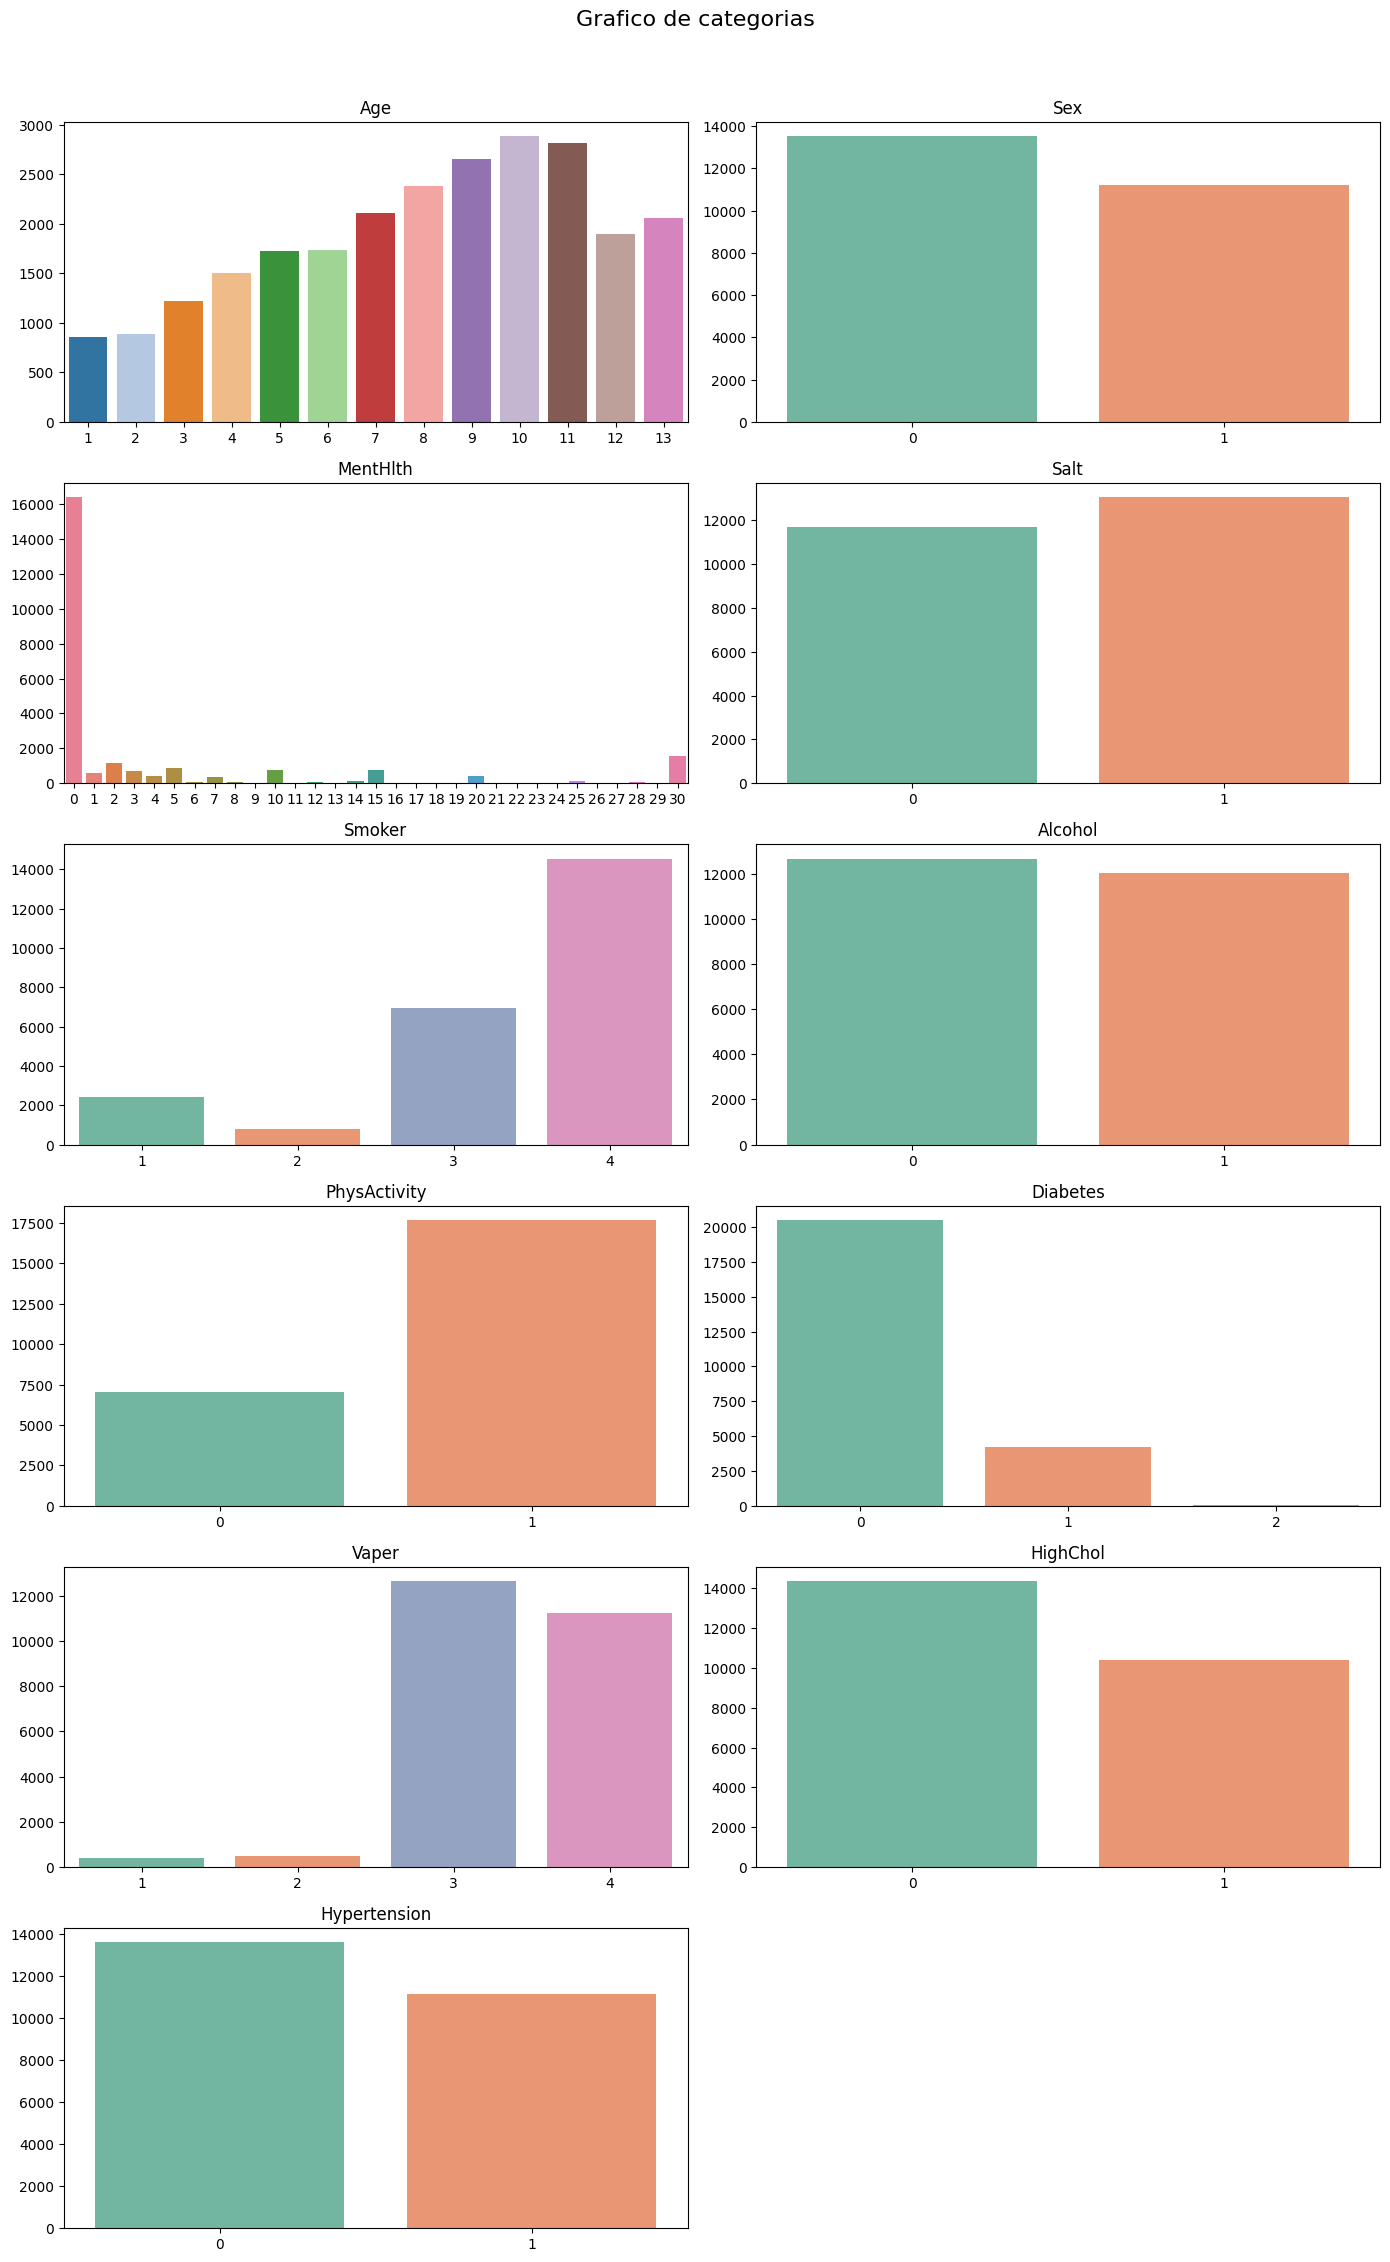

In [31]:
# Lista de columnas
col = ['Age', 'Sex', 'MentHlth', 'Salt', 'Smoker', 'Alcohol',
       'PhysActivity', 'Diabetes', 'Vaper', 'HighChol', 'Hypertension']

# Crear la figura
plt.figure(figsize=(14, 40))
plt.suptitle("Grafico de categorias", fontsize=16, x=0.5, y=1.01)

for i, column in enumerate(col):
    plt.subplot(len(col), 2, i + 1)

    # Obtener número de categorías únicas
    num_cats = DF[column].nunique()

    # Elegir paleta adecuada
    if num_cats <= 10:
        palette = sns.color_palette("Set2", n_colors=num_cats)
    elif num_cats <= 20:
        palette = sns.color_palette("tab20", n_colors=num_cats)
    else:
        palette = sns.color_palette("husl", n_colors=num_cats)  # Paleta continua y clara

    # Graficar
    sns.countplot(data=DF, x=column, palette=palette, hue=column, legend=False)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()

# Mostrar los gráficos
plt.show()

Tienen Hipertensión: 11146
No tienen Hipertensión: 13590


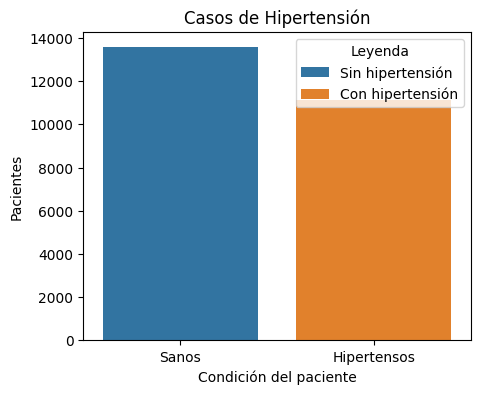

In [32]:
# Cantidad de pacientes con y sin hipertensión
hypertension_counts = DF['Hypertension'].value_counts()
print('Tienen Hipertensión:', hypertension_counts[1])
print('No tienen Hipertensión:', hypertension_counts[0])

# Establece el tamaño de la figura
plt.figure(figsize=(5, 4))

# Gráfico de barras para comparar pacientes hipertensos y no hipertensos
sns.countplot(data=DF, x='Hypertension', hue='Hypertension')
plt.title('Casos de Hipertensión')
plt.xlabel('Condición del paciente')
plt.xticks(ticks=[0, 1], labels=['Sanos', 'Hipertensos'])
plt.ylabel('Pacientes')
plt.legend(title='Leyenda', labels=['Sin hipertensión', 'Con hipertensión'])

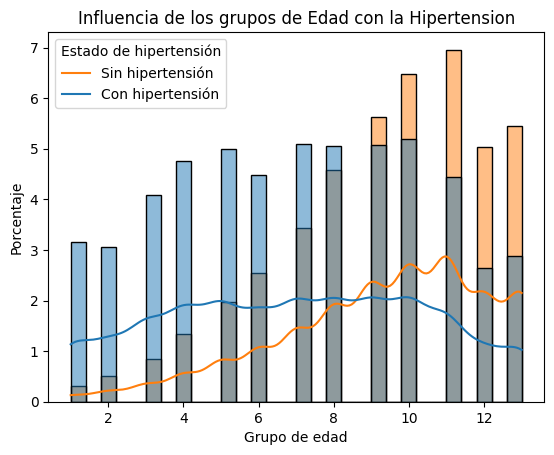

In [33]:
# Tramar un histograma para visualizar la distribución de la edad con respecto a la hipertensión
# x='Age' indica la variable de interés que se distribuirá en el histograma
# hue='Hypertension' permite diferenciar los grupos de hipertensión en el histograma
# kde=True agrega una estimación de la densidad del núcleo a la trama
# stat='percent' establece el estadístico para la altura de la barra como porcentaje
sns.histplot(data=DF, x='Age', hue='Hypertension', kde=True, stat='percent')

# Establecer el título del gráfico
plt.title('Influencia de los grupos de Edad con la Hipertension')
plt.xlabel('Grupo de edad')
plt.ylabel('Porcentaje')
plt.legend(title='Estado de hipertensión', labels=['Sin hipertensión', 'Con hipertensión'])
plt.show()

Hombres: 11209
Mujeres: 13527
-----------------------------------------------
Mujeres sanas: 7793
Mujeres hipertensas: 5734
Hombres sanos: 5797
Hombres hipertensos: 5412


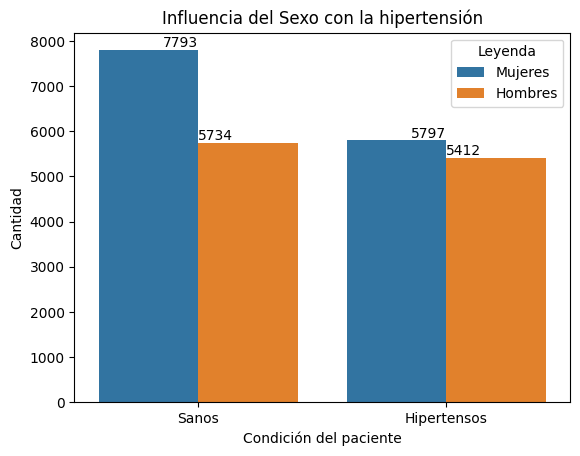

In [34]:
# Cantidad de hombres y mujeres en el DataFrame
sex_counts = DF['Sex'].value_counts()
print('Hombres:', sex_counts[1])
print('Mujeres:', sex_counts[0])
print('-----------------------------------------------')

# Cálculo de la cantidad de personas sanas e hipertensas para hombres y mujeres
sanos_mujeres = len(DF[(DF['Sex'] == 0) & (DF['Hypertension'] == 0)])
hipertensos_mujeres = len(DF[(DF['Sex'] == 0) & (DF['Hypertension'] == 1)])
sanos_hombres = len(DF[(DF['Sex'] == 1) & (DF['Hypertension'] == 0)])
hipertensos_hombres = len(DF[(DF['Sex'] == 1) & (DF['Hypertension'] == 1)])
print('Mujeres sanas:', sanos_mujeres)
print('Mujeres hipertensas:', hipertensos_mujeres)
print('Hombres sanos:', sanos_hombres)
print('Hombres hipertensos:', hipertensos_hombres)

# Visualización del gráfico
sns.countplot(data=DF, x='Sex', hue='Hypertension')
plt.title('Influencia del Sexo con la hipertensión')
plt.xlabel('Condición del paciente')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Sanos', 'Hipertensos'])
plt.legend(title='Leyenda', labels=['Mujeres', 'Hombres'])

# Agregar el texto correspondiente a cada columna
plt.text(0, sanos_mujeres, sanos_mujeres, ha='right', va='bottom')
plt.text(0, hipertensos_mujeres, hipertensos_mujeres, ha='left', va='bottom')
plt.text(1, sanos_hombres, sanos_hombres, ha='right', va='bottom')
plt.text(1, hipertensos_hombres, hipertensos_hombres, ha='left', va='bottom')

plt.show()

Hombres:  11209
Mujeres:  13527


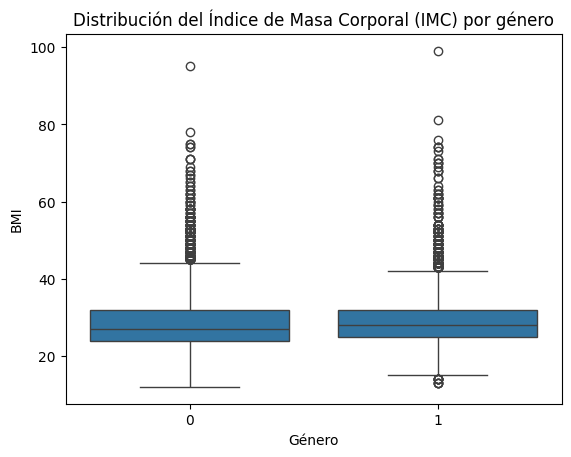

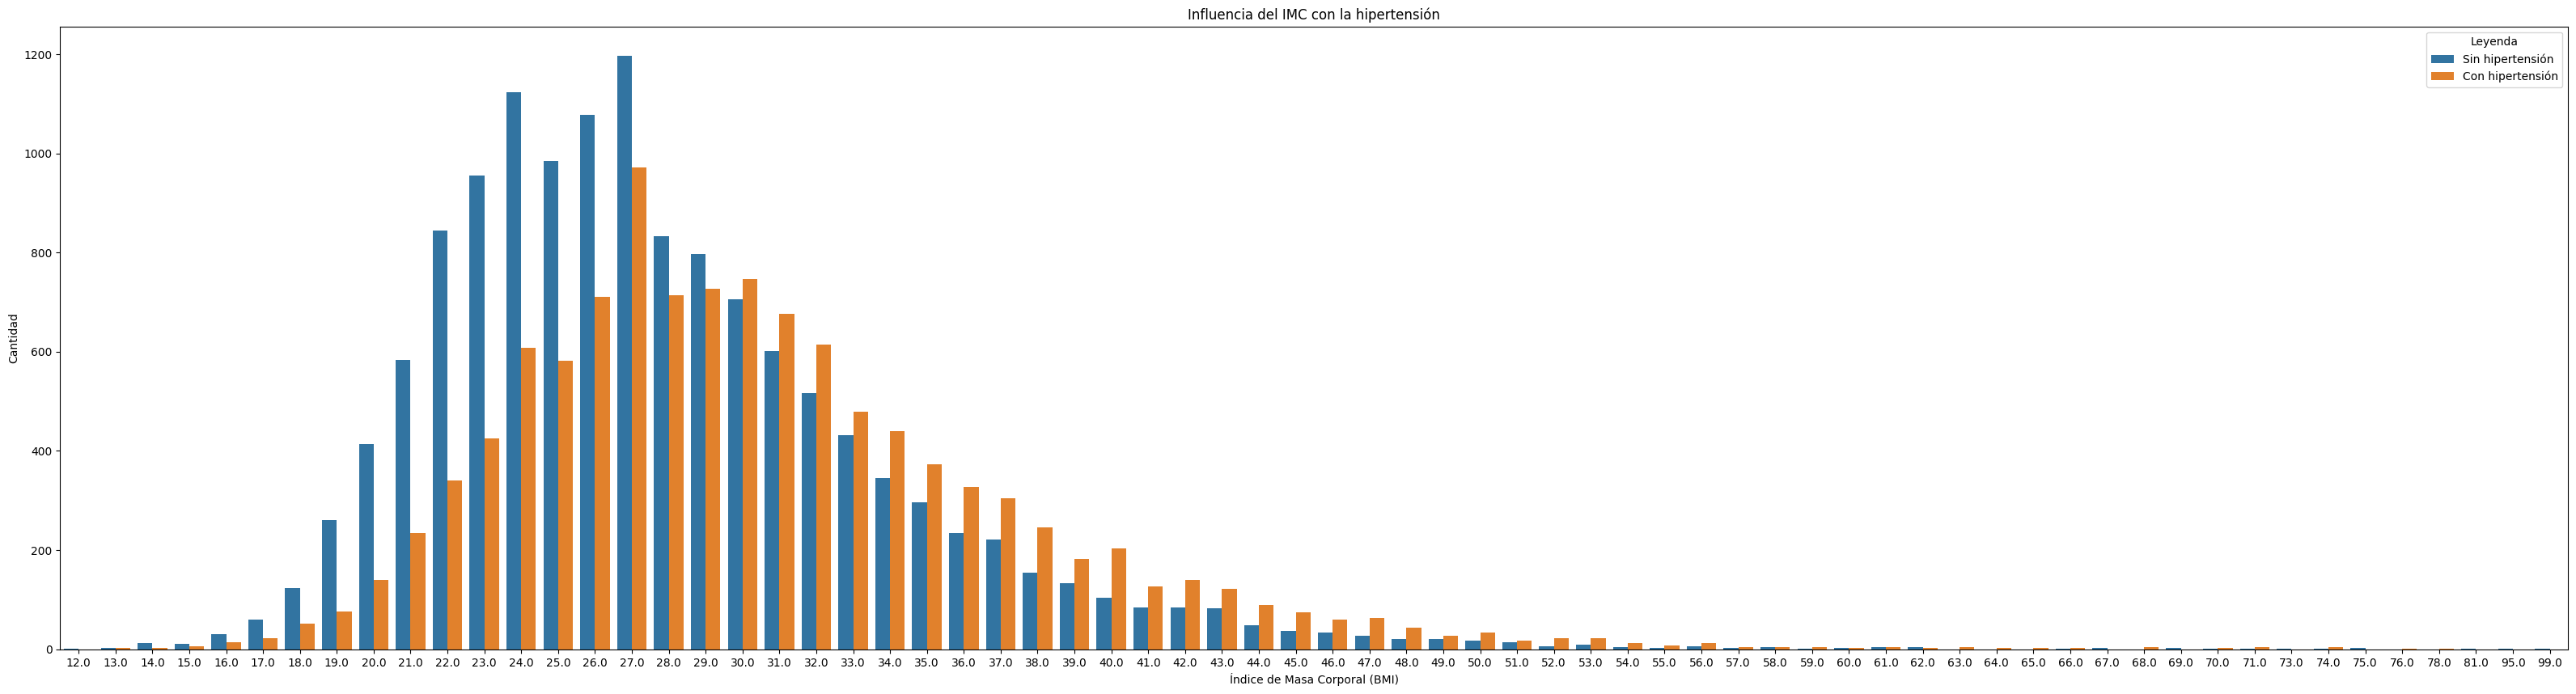

In [35]:
# Contar la cantidad de hombres y mujeres en el DataFrame
print('Hombres: ', DF.Sex.value_counts()[1])
print('Mujeres: ', DF.Sex.value_counts()[0])

# Crear un gráfico de caja para visualizar la distribución del índice de masa corporal (BMI) por género
sns.boxplot(x='Sex', y='BMI', data=DF)
plt.title('Distribución del Índice de Masa Corporal (IMC) por género')
plt.xlabel('Género')
plt.ylabel('BMI')
plt.show()

# Crear un gráfico de barras para visualizar la relación entre el IMC y la hipertensión
plt.figure(figsize=(40, 10))  # Establecer el tamaño de la figura
sns.countplot(data=DF, x='BMI', hue='Hypertension')
plt.title('Influencia del IMC con la hipertensión')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Cantidad')
plt.legend(title='Leyenda', labels=['Sin hipertensión', 'Con hipertensión'])


## Correlación entre las variables

Calcula la matriz de correlación entre todas las variables del DataFrame DF.
Luego, utiliza esta matriz para crear un mapa de calor que visualiza las correlaciones entre las variables.

### Matriz de correlación

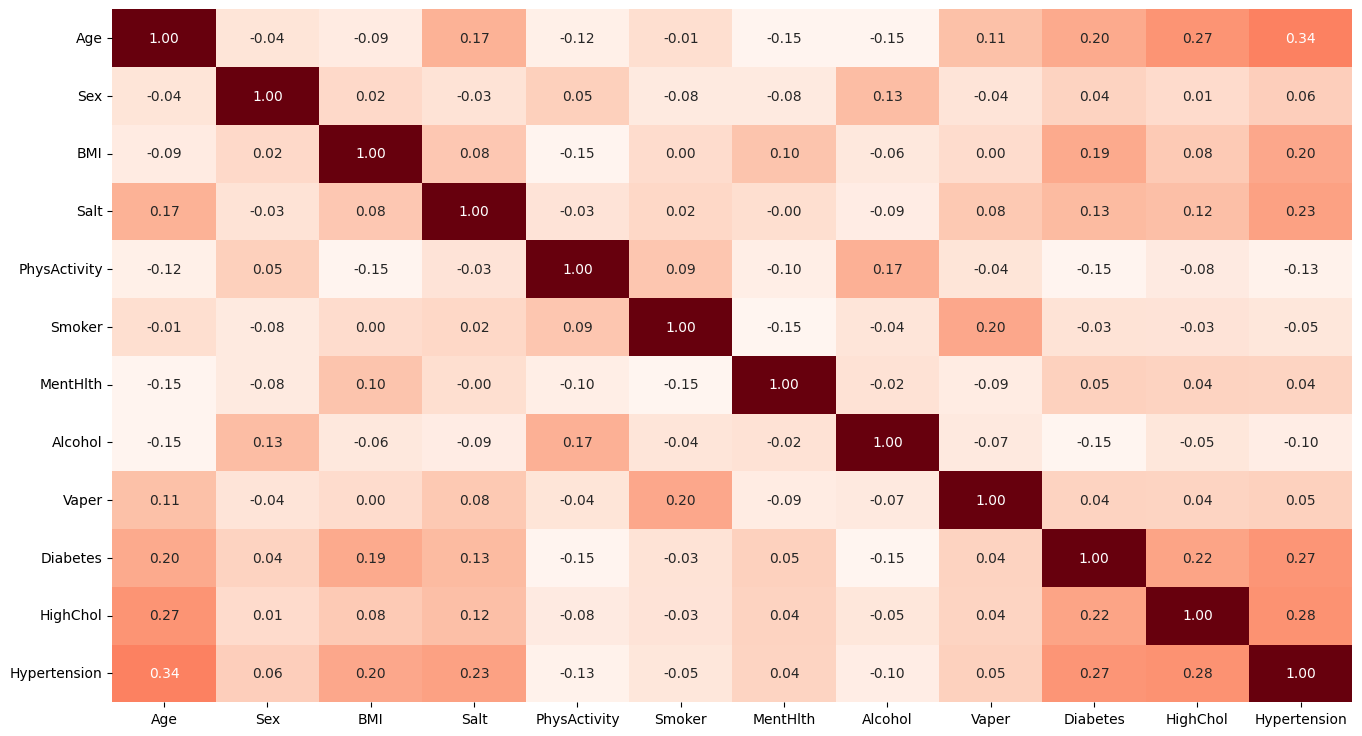

In [36]:
# Calcula la matriz de correlación entre las variables del DataFrame
corr = DF.corr()

# Configura el tamaño de la figura para la visualización del mapa de calor
plt.figure(figsize=(16, 9))

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(corr, cmap='Reds', cbar=False, annot=True, fmt='.2f')

# Muestra el mapa de calor
plt.show()

### Correlación entre variables

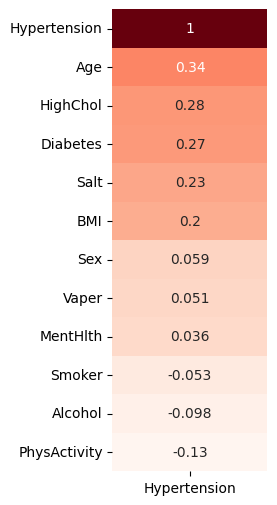

In [37]:
# Calcula la correlación de cada característica con la columna 'Hypertension',
# luego la ordena de forma descendente y la convierte en un marco de datos
corr = DF.corr()['Hypertension'].sort_values(ascending=False).to_frame()

# Configura el tamaño de la figura para la visualización del mapa de calor
plt.figure(figsize=(2, 6))

# Crea un mapa de calor de la matriz de correlación con la característica 'Hypertension'
sns.heatmap(corr, cmap='Reds', cbar=False, annot=True)

# Muestra el mapa de calor
plt.show()

## Balanceo de datos

### Visualización de los datos sin SMOTE


In [38]:
# Dividir el conjunto de datos en características (x) y etiquetas (y), eliminando la columna 'Hypertension' de las características
x = DF.drop('Hypertension', axis=1).values
y = DF['Hypertension']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Imprimir la proporción de personas hipertensas en los conjuntos de entrenamiento y prueba
print('Proporción de personas hipertensas en los conjuntos de entrenamiento y prueba\n')
print(f'''% Personas hipertensas en el conjunto de entrenamiento = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Personas hipertensas en el conjunto de prueba = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

Proporción de personas hipertensas en los conjuntos de entrenamiento y prueba

% Personas hipertensas en el conjunto de entrenamiento = 45.01
% Personas hipertensas en el conjunto de prueba = 45.27


### Visualización de datos con SMOTE

In [39]:
# Seleccionar las características (x) excluyendo la columna 'Hypertension', y seleccionar la columna 'Hypertension' como etiquetas (y)
x = DF.drop('Hypertension', axis=1).values
y = DF['Hypertension']

# Aplicar SMOTE para equilibrar las clases
sm = SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(x, y)


# Imprimir los cambios en las formas de los datos antes y después de aplicar SMOTE
print(f'''Cambio de X antes de SMOTE: {x.shape}
Cambio de X después de SMOTE: {x_sm.shape}''')

# Imprimir el balance positivo y negativo de las clases (%)
print('\nBalance positivo y negativo de las clases (%):')
print(y_sm.value_counts(normalize=True) * 100)

Cambio de X antes de SMOTE: (24736, 11)
Cambio de X después de SMOTE: (27180, 11)

Balance positivo y negativo de las clases (%):
Hypertension
1    50.0
0    50.0
Name: proportion, dtype: float64


In [40]:
# Guardar conjunto balanceado con SMOTE
df_smote = pd.concat([
    pd.DataFrame(x_sm, columns=DF.drop('Hypertension', axis=1).columns),
    pd.DataFrame(y_sm, columns=['Hypertension'])
], axis=1)

df_smote.to_csv("dataset_balanceado_smote1.csv", index=False)
print("✅ Dataset balanceado guardado como 'dataset_balanceado_smote.csv'")

✅ Dataset balanceado guardado como 'dataset_balanceado_smote.csv'


## Entrenamiento

**División de Datos: Entrenamiento y Prueba**

Se realiza la división en entrenamiento (80%) y prueba (20%) utilizando la función train_test_split de la librería Scikit-Learn.


### Random Forest

In [41]:
# Entrenar modelo con los datos balanceados
final_model_rf = RandomForestClassifier(random_state=42, criterion='gini', max_features='sqrt')
final_model_rf.fit(x_sm, y_sm)

# Evaluar el modelo en el conjunto de prueba real
y_pred_test = final_model_rf.predict(x_test)

# Mostrar el reporte de clasificación
print("📄 Reporte de evaluación - Random Forest:")
print(classification_report(y_test, y_pred_test, target_names=["Sano", "Hipertenso"]))

📄 Reporte de evaluación - Random Forest:
              precision    recall  f1-score   support

        Sano       0.95      0.95      0.95      2708
  Hipertenso       0.94      0.94      0.94      2240

    accuracy                           0.94      4948
   macro avg       0.94      0.94      0.94      4948
weighted avg       0.94      0.94      0.94      4948



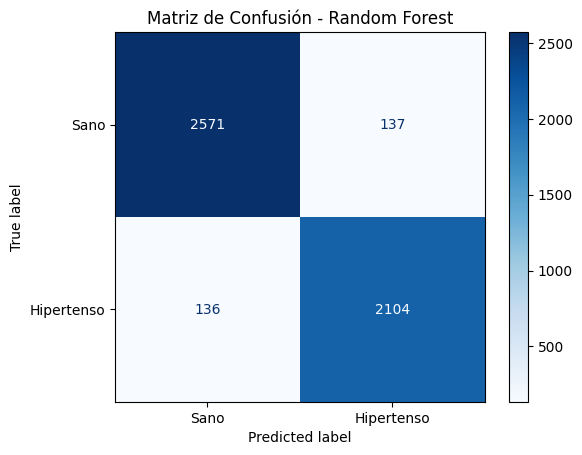

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(y_test, y_pred_test)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Sano", "Hipertenso"])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Random Forest")
plt.show()


## Evaluación de los modelos

In [43]:
def evaluar_modelo(nombre, modelo, x_train, y_train, x_test, y_test):
    print(f"\n📊 Evaluación para {nombre}")

    # 1. AUC-ROC
    y_proba_test = modelo.predict_proba(x_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba_test)

    # 2. Log loss (tasa de pérdida)
    y_proba_train = modelo.predict_proba(x_train)
    loss_train = log_loss(y_train, y_proba_train)
    loss_test = log_loss(y_test, modelo.predict_proba(x_test))

    # 3. Tiempo de inferencia promedio
    n = len(x_test)
    start_time = time.time()
    _ = modelo.predict(x_test)
    end_time = time.time()
    tiempo_prom = (end_time - start_time) / n * 1000  # en milisegundos

    # Resultados
    print(f"✅ AUC-ROC: {auc:.4f}")
    print(f"📉 Log Loss (Entrenamiento): {loss_train:.4f}")
    print(f"📉 Log Loss (Prueba): {loss_test:.4f}")
    print(f"⏱️ Tiempo de inferencia promedio: {tiempo_prom:.6f} ms")

    # Gráfico AUC-ROC
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Curva ROC - {nombre}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



📊 Evaluación para Random Forest
✅ AUC-ROC: 0.9906
📉 Log Loss (Entrenamiento): 0.1863
📉 Log Loss (Prueba): 0.2049
⏱️ Tiempo de inferencia promedio: 0.029627 ms


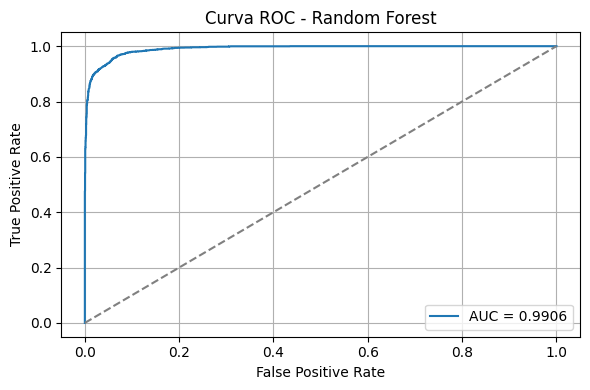

In [44]:
# Evaluar Random Forest
evaluar_modelo("Random Forest", final_model_rf, x_sm, y_sm, x_test, y_test)


,Modelo,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.944826,0.938867,0.939286,0.939076


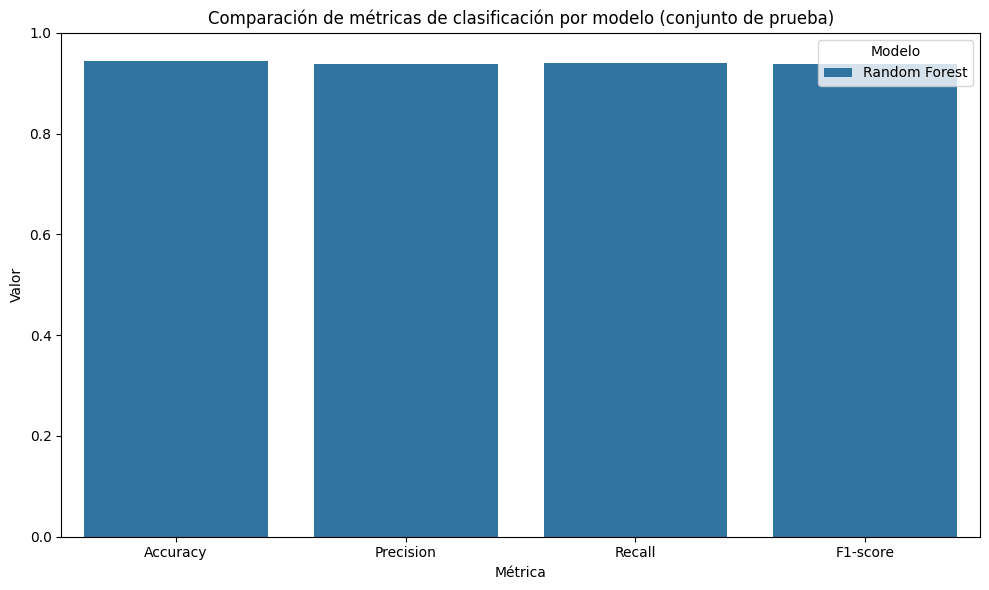

In [46]:
# Función para obtener métricas
def obtener_metricas_clasificacion(nombre, modelo, x_test, y_test):
    y_pred = modelo.predict(x_test)
    return {
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    }

# Obtener métricas por modelo
metricas_rf = obtener_metricas_clasificacion("Random Forest", final_model_rf, x_test, y_test)

# Crear DataFrame
df_metricas_clas = pd.DataFrame([metricas_rf])

# Mostrar tabla
display(df_metricas_clas)

# Gráfico de barras agrupadas
df_melted = df_metricas_clas.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Métrica', y='Valor', hue='Modelo')
plt.ylim(0, 1)
plt.title("Comparación de métricas de clasificación por modelo (conjunto de prueba)")
plt.ylabel("Valor")
plt.xlabel("Métrica")
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()

###Exportar modelo

In [48]:
# Exportar modelo Random Forest
joblib.dump(final_model_rf, "modelo_random_forest.pkl", compress=9)
print("✅ Modelo Random Forest exportado como 'modelo_random_forest.pkl'")

✅ Modelo Random Forest exportado como 'modelo_random_forest.pkl'


###Cargar modelos

In [49]:
modelo_rf = joblib.load("modelo_random_forest.pkl")

### Pruebas con los modelos

In [50]:
import joblib
import numpy as np
# === 1. Cargar el modelo previamente exportado ===
modelo = joblib.load("modelo_random_forest.pkl")

# === 2. Datos de entrada manuales (simulan una persona) ===
# Grupo de edad => [1: 18-24] [2: 25-29] [3: 30-34] [4: 35-39] [5: 40-44] [6: 45-49] [7: 50-54] [8: 55-59] [9: 60-64] [10: 65-69] [11: 70-74] [12: 75-79] [13: 80-100]
Age = 9
Sex = 0  #[Hombre = 1, Mujer = 0]
BMI = 31.2 #[15-50]
MentHlth = 10 # [0-30]
Salt = 0 # [Si = 1 | No = 0]
PhysActivity = 0 # [Si = 1 | No = 0]
Smoker = 4 # [Fuma a diario = 1 | Fuma algunos dias = 2 | Exfumador = 3| No fuma = 4]
Vaper = 4 # [Todos los dias = 1 | Algunos dias = 2 | Exfumador = 3| No fuma = 4]
Alcohol = 0 # [No = 0 | Si = 1]
Diabetes = 1 # [Si = 1 | No = 0]
HighChol = 1 # [No = 0 | Si = 1]

# === 3. Crear vector de entrada ===
xnew = np.array([[Age, Sex, BMI, MentHlth, Salt, PhysActivity, Smoker, Vaper, Alcohol, Diabetes, HighChol]])

# === 4. Realizar predicción y obtener probabilidad ===
proba = modelo.predict_proba(xnew)[0][1]  # Probabilidad de clase positiva (hipertensión)
y_pred = modelo.predict(xnew)[0]          # Clase predicha (0 o 1)

# === 5. Clasificación del nivel de riesgo ===
if proba < 0.35:
    riesgo = 'Bajo'
elif proba < 0.65:
    riesgo = 'Moderado'
else:
    riesgo = 'Alto'

# === 6. Mensaje personalizado ===
if y_pred == 0:
    mensaje = '✅ Felicidades: No eres propenso a desarrollar hipertensión arterial.'
else:
    mensaje = '⚠️ A tomar precauciones: Eres propenso a desarrollar hipertensión arterial.'

# === 7. Mostrar resultados ===
print(f"🔮 Predicción: {y_pred} (0 = Sano, 1 = Hipertenso)")
print(f"📈 Probabilidad de riesgo: {proba * 100:.2f}%")
print(f"📊 Nivel de riesgo: {riesgo}")
print(mensaje)


🔮 Predicción: 1 (0 = Sano, 1 = Hipertenso)
📈 Probabilidad de riesgo: 92.00%
📊 Nivel de riesgo: Alto
⚠️ A tomar precauciones: Eres propenso a desarrollar hipertensión arterial.
